## Loading Data

In [1]:
import pandas as pd # for manipulating data
import numpy as np  # for working with numerical data
import matplotlib.pyplot as plt  #for visualization data
import seaborn as sns #for visualization data

##### Source - https://data.gov.in/resources/all-india-crowdsourced-mobile-data-speed-measurement-february-2020


Data is collected from the data.gov.in(Open Government Data (OGD) Platform India).This dataset provides Crowdsourced Mobile Data Speeds and other network information.

In [2]:
url = "C:/Users/krishna sai/Downloads/MySpeed_2021.csv" # loding the data from the location 
df=pd.read_csv(url)  # read's the csv file 
df

,Service_provider,technology,Download_Upload,Data_Speed(Kbps),signal_strength,Service_Area
0,AIRTEL,4G,download,224,-59.0,UP East
1,AIRTEL,4G,download,17,NaN,UP East
2,AIRTEL,4G,download,24,-59.0,UP East
3,AIRTEL,4G,upload,37,-59.0,UP East
4,AIRTEL,4G,upload,749,-67.0,UP East
...,...,...,...,...,...,...
265496,CELLONE,3G,upload,515,NaN,Maharashtra
265497,CELLONE,3G,upload,1370,NaN,Maharashtra
265498,CELLONE,3G,upload,2940,NaN,Maharashtra
265499,CELLONE,4G,upload,1520,NaN,Maharashtra


##  Data characterization and Variable Identification

In [3]:
df.shape # this gives us the number of rows and colums on the dataset

(265501, 6)

In [4]:
df.info() # to get the general information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265501 entries, 0 to 265500
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Service_provider  265501 non-null  object 
 1   technology        265501 non-null  object 
 2   Download_Upload   265501 non-null  object 
 3   Data_Speed(Kbps)  265501 non-null  int64  
 4   signal_strength   212655 non-null  float64
 5   Service_Area      263619 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.2+ MB


Target Variable: serviceprovider

Input variables: technology,dataspeed,signalstr,servicearea

In [5]:
df.describe() # this is useful to help understand the numeric columns

,Data_Speed(Kbps),signal_strength
count,265501.000000,212655.000000
mean,7681.788878,-81.363504
std,14043.407482,18.029455
min,0.000000,-112.000000
25%,770.000000,-98.000000
50%,2737.000000,-81.000000
75%,7806.000000,-67.000000
max,130196.000000,-50.000000


In [6]:
df.describe(include='object') # if we want to see the other than numeric columns we can specify here

,Service_provider,technology,Download_Upload,Service_Area
count,265501,265501,265501,263619
unique,5,2,2,23
top,JIO,4G,download,Maharashtra
freq,129893,256457,132757,43749


In [7]:
df.describe(include='all') # To expand to other types as By default, describe() applies to numeric columns

,Service_provider,technology,Download_Upload,Data_Speed(Kbps),signal_strength,Service_Area
count,265501,265501,265501,265501.000000,212655.000000,263619
unique,5,2,2,NaN,NaN,23
top,JIO,4G,download,NaN,NaN,Maharashtra
freq,129893,256457,132757,NaN,NaN,43749
mean,NaN,NaN,NaN,7681.788878,-81.363504,NaN
std,NaN,NaN,NaN,14043.407482,18.029455,NaN
min,NaN,NaN,NaN,0.000000,-112.000000,NaN
25%,NaN,NaN,NaN,770.000000,-98.000000,NaN
50%,NaN,NaN,NaN,2737.000000,-81.000000,NaN
75%,NaN,NaN,NaN,7806.000000,-67.000000,NaN


In [8]:
df.rename(columns = {'Service_provider':'serviceprovider','Download_Upload':'downloadupload','Data_Speed(Kbps)':'dataspeed','signal_strength':'signalstr','Service_Area':'servicearea'}, inplace = True)
#using this we can rename the columns name

In [9]:
df['serviceprovider'].nunique() # this will give the unique in a particular column

5

In [10]:
df['serviceprovider'].value_counts() # this will count the number of unique values in a particular column

JIO         129893
AIRTEL       83016
IDEA         22273
VODAFONE     20973
CELLONE       9346
Name: serviceprovider, dtype: int64

In [11]:
df['serviceprovider'] = df['serviceprovider'].astype('category')  #this will convert the datatype to categorical

In [12]:
df['serviceprovider'].dtype # using this we can confirm it

CategoricalDtype(categories=['AIRTEL', 'CELLONE', 'IDEA', 'JIO', 'VODAFONE'], ordered=False)

In [13]:
df['serviceprovider'].nunique() # this will give the unique in a particular column

5

In [14]:
df['servicearea'].nunique() # this will give the unique in a particular column

23

In [15]:
df['servicearea'].value_counts() # this will count the number of unique values in a particular column

Maharashtra         43749
Andhra Pradesh      25963
UP East             25347
Kerala              21353
Tamil Nadu          17866
UP West             12198
Gujarat             11899
Bihar               11549
Karnataka           10951
Madhya Pradesh      10140
Delhi                9955
Rajasthan            9163
Mumbai               8068
Punjab               7592
West Bengal          6670
Orissa               5762
Kolkata              5596
Chennai              5177
Haryana              4956
Jammu & Kashmir      4706
Assam                2225
Himachal Pradesh     2143
North East            591
Name: servicearea, dtype: int64

In [16]:
df['technology'].nunique()   # this will give the unique in a particular column

2

In [17]:
df['technology'].value_counts() # this will count the number of unique values in a particular column

4G    256457
3G      9044
Name: technology, dtype: int64

In [18]:
df['technology'] = df['technology'].astype('category')

In [19]:
df['technology'].dtype

CategoricalDtype(categories=['3G', '4G'], ordered=False)

In [20]:
df['downloadupload'].nunique() # this will give the unique in a particular column

2

In [21]:
df['downloadupload'].value_counts()    # this will count the number of unique values in a particular column

download    132757
upload      132744
Name: downloadupload, dtype: int64

In [22]:
df['downloadupload'] = df['downloadupload'].astype('category')

In [23]:
df['downloadupload'].dtype

CategoricalDtype(categories=['download', 'upload'], ordered=False)

In [24]:
series_of_type_per_column = df.dtypes
for col,col_type in series_of_type_per_column.iteritems():
    if(col_type=='object'):
        print(col,'has',df[col].nunique(),'unique entries')

servicearea has 23 unique entries


In [25]:
def uniq_per_col(df,count):  # this function will return the number of unique values in a column
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [26]:
uniq_per_col(df,1)   # calling the function will return the number of unique entries


====  serviceprovider has 5 unique entries ====
JIO    129893
Name: serviceprovider, dtype: int64

====  technology has 2 unique entries ====
4G    256457
Name: technology, dtype: int64

====  downloadupload has 2 unique entries ====
download    132757
Name: downloadupload, dtype: int64

====  dataspeed has 35780 unique entries ====
0    1402
Name: dataspeed, dtype: int64

====  signalstr has 63 unique entries ====
-51.0    11482
Name: signalstr, dtype: int64

====  servicearea has 23 unique entries ====
Maharashtra    43749
Name: servicearea, dtype: int64


### Data Cleaning-Handling Missing Values

In [27]:
df.isnull().sum() # this will give the number of null values in a column

serviceprovider        0
technology             0
downloadupload         0
dataspeed              0
signalstr          52846
servicearea         1882
dtype: int64

Problems in the data - As we can here there are null present in 2 columns signalstr and servicearea we need to handle.

In [28]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

servicearea: 0.0071% missing values


In [29]:
## Replace missing value with a new label
def replace(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('India') # the data is being analysed in different indian states so we can replace the rest with the India which included all other states. 
    return data
df=replace(df,features_nan)
df[features_nan].isnull().sum()

servicearea    0
dtype: int64

In [30]:
df.head() # we can see the first 5 rows of the dataset

,serviceprovider,technology,downloadupload,dataspeed,signalstr,servicearea
0,AIRTEL,4G,download,224,-59.0,UP East
1,AIRTEL,4G,download,17,NaN,UP East
2,AIRTEL,4G,download,24,-59.0,UP East
3,AIRTEL,4G,upload,37,-59.0,UP East
4,AIRTEL,4G,upload,749,-67.0,UP East


In [31]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
## We will print the numerical null variables and percentage of missing values
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

signalstr: 0.199% missing value


In [32]:
df['signalstr']= df['signalstr'].replace(np.NaN,df['signalstr'].mean()) # replace them with the mean

In [33]:
df.isnull().sum() # here we can verify where still are there any missing values

serviceprovider    0
technology         0
downloadupload     0
dataspeed          0
signalstr          0
servicearea        0
dtype: int64

In the signalstr column we have replaced the null with the mean and in the servicearea column we have reaplced the null value with India.

In [34]:
df # here you can see the data frame

,serviceprovider,technology,downloadupload,dataspeed,signalstr,servicearea
0,AIRTEL,4G,download,224,-59.000000,UP East
1,AIRTEL,4G,download,17,-81.363504,UP East
2,AIRTEL,4G,download,24,-59.000000,UP East
3,AIRTEL,4G,upload,37,-59.000000,UP East
4,AIRTEL,4G,upload,749,-67.000000,UP East
...,...,...,...,...,...,...
265496,CELLONE,3G,upload,515,-81.363504,Maharashtra
265497,CELLONE,3G,upload,1370,-81.363504,Maharashtra
265498,CELLONE,3G,upload,2940,-81.363504,Maharashtra
265499,CELLONE,4G,upload,1520,-81.363504,Maharashtra


# Data Visualization

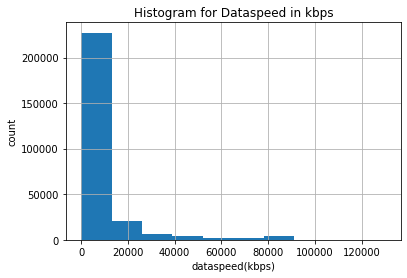

In [35]:
df['dataspeed'].hist() # histogram for dataspeed as being a numerical value histogram is the right choice to visualize it.
plt.ylabel('count')
plt.xlabel('dataspeed(kbps)')
plt.title('Histogram for Dataspeed in kbps')
plt.show()

Text(0.5, 1.0, 'Histogram for signal strength')

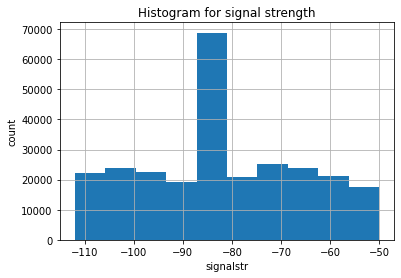

In [36]:
df['signalstr'].hist()#histogram for signalstr as being a numerical value
plt.ylabel('count')
plt.xlabel('signalstr')
plt.title('Histogram for signal strength')

Text(0.5, 1.0, 'Histogram for servicearea')

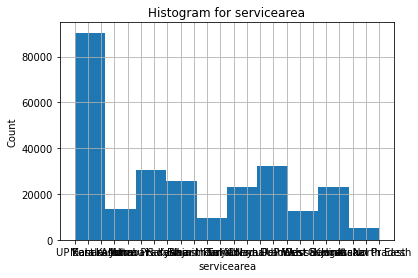

In [37]:
df['servicearea'].hist() #histogram for servicearea as being a numerical value
plt.xlabel('servicearea')
plt.ylabel('Count')
plt.title('Histogram for servicearea')

In [38]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,serviceprovider,technology,downloadupload,dataspeed,signalstr
0,AIRTEL,4G,download,224,-59.000000
1,AIRTEL,4G,download,17,-81.363504
2,AIRTEL,4G,download,24,-59.000000
3,AIRTEL,4G,upload,37,-59.000000
4,AIRTEL,4G,upload,749,-67.000000


In [39]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [40]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


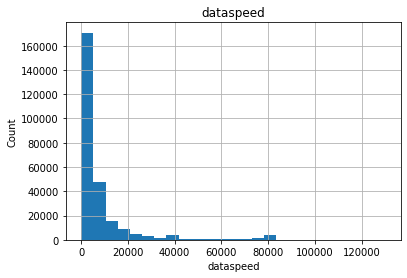

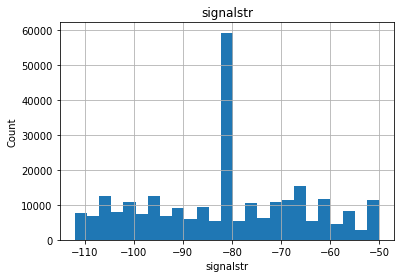

In [41]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Boxplots for outlier's

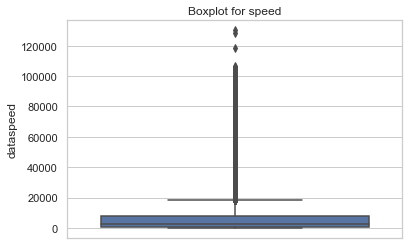

In [42]:
sns.set_theme(style="whitegrid")
sns.boxplot(y = df.dataspeed)
plt.title('Boxplot for speed')
plt.show()

### Detecting the outliers using IQR and removing them.

In [43]:
Q1 = np.percentile(df['dataspeed'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['dataspeed'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['dataspeed'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['dataspeed'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (265501, 6)
New Shape:  (238797, 6)


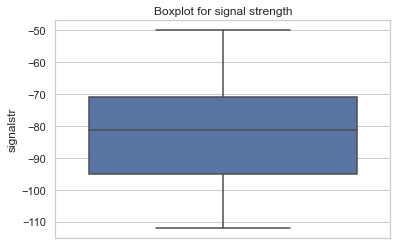

In [44]:
sns.set_theme(style="whitegrid")
sns.boxplot(y = df.signalstr)
plt.title('Boxplot for signal strength')
plt.show()

In [45]:
Q1 = np.percentile(df['signalstr'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['signalstr'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['signalstr'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['signalstr'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (238797, 6)
New Shape:  (238797, 6)


### Bar graph for categorical data 

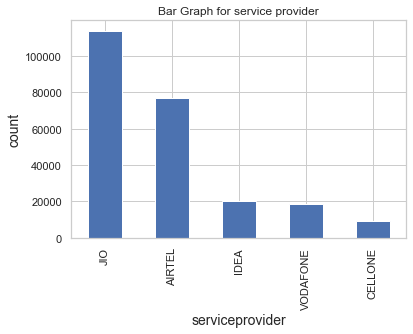

In [46]:
_=df['serviceprovider'].value_counts().plot(kind="bar") # bar graph for serviceprovider column as bar graph is best for categorical
_=plt.xlabel('serviceprovider', fontsize=14)
_=plt.ylabel('count',fontsize=14)
_=plt.title('Bar Graph for service provider')

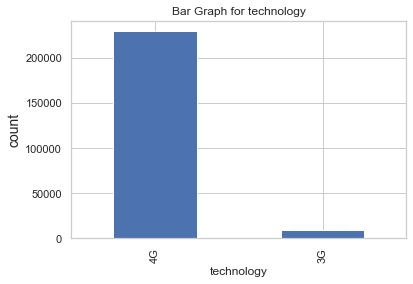

In [47]:
_=df['technology'].value_counts().plot(kind="bar") # bar graph for technology
_=plt.xlabel('technology')
_=plt.ylabel('count',fontsize=14)
_=plt.title('Bar Graph for technology')

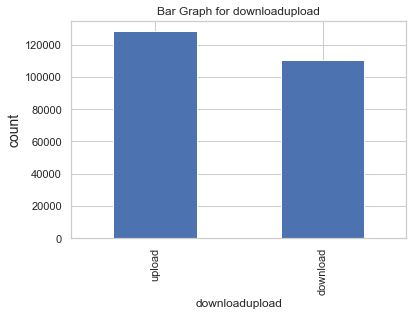

In [48]:
_=df['downloadupload'].value_counts().plot(kind="bar") #bar graph for downlaodupload column
_=plt.xlabel('downloadupload')
_=plt.ylabel('count',fontsize=14)
_=plt.title('Bar Graph for downloadupload')

#### To get the relation between the 2 specific column

In [49]:
## sometimes we might want to compare a categorical variable wrt a continuous one.

## seaborn has a `catplot` method for this kind of plots.

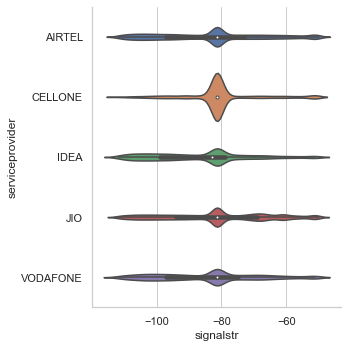

In [50]:
sns.catplot(y = 'serviceprovider', x = 'signalstr', data = df, kind = 'violin') #to compare a categorical variable wrt a continuous one

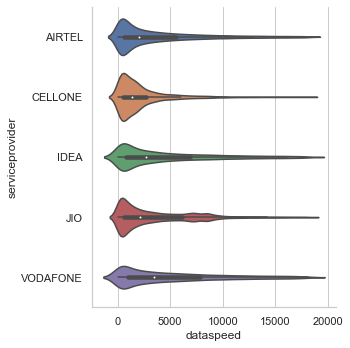

In [51]:
sns.catplot(y = 'serviceprovider', x = 'dataspeed', data = df, kind = 'violin')

<AxesSubplot:xlabel='signalstr', ylabel='dataspeed'>

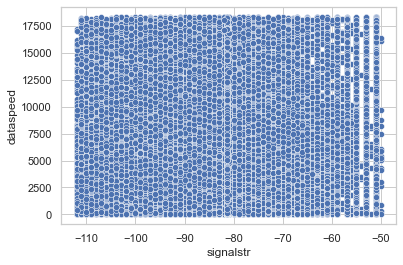

In [52]:
sns.set(style='whitegrid') # we won't get much infomation from this scatter plot as points are points are spread evenly
sns.scatterplot(x="signalstr", y="dataspeed",data=df)

### Sanity check

In [53]:
df.dataspeed.max() #this gives us the maximum value of the dataspeed column

18359

In [54]:
df.dataspeed.min()  #this gives us the minimum value of the dataspeed column

0

In [55]:
df.signalstr.max()  #this gives us the mazimum value of the signalstr column

-50.0

In [56]:
df.signalstr.min() # this gives us the minimum value of the signalstr column 

-112.0

In [57]:
df.servicearea.max() # from here we can conclude that most of the speedtest is conducted in westbengal by all providers

'West Bengal'

In [58]:
df.servicearea.min() #from here we can conclude that min of the speedtest is conducted in andhra Pradesh by all providers

'Andhra Pradesh'

In [59]:
df.dataspeed.var() #variance of dataspeed 

16962774.228593905

In [60]:
df.signalstr.var() #variance of signal strength

256.4722229727165

### Data analysis
### Share of Tests among service Provider

In [61]:
sp = df.serviceprovider.value_counts()*100/df.serviceprovider.value_counts().sum()
sp

JIO         47.744318
AIRTEL      32.198059
IDEA         8.392065
VODAFONE     7.770198
CELLONE      3.895359
Name: serviceprovider, dtype: float64

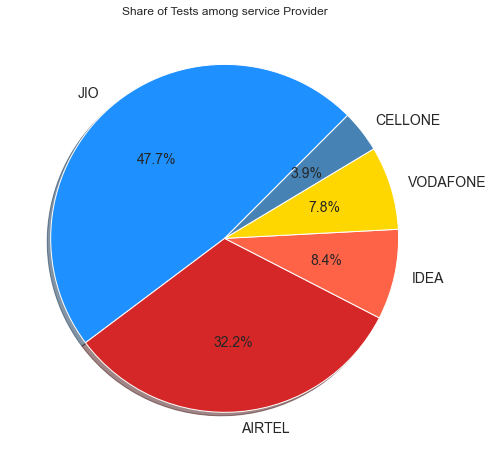

In [62]:
fig, ax = plt.subplots(figsize=[8,8])
labels = sp.index
values = sp.values
colors = ['dodgerblue','tab:red','tomato','gold','steelblue','forestgreen']
patches, texts, autotexts = plt.pie(values, labels=labels, colors=colors,autopct='%.1f%%', shadow=True, startangle=45)
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
plt.savefig('sp', bbox_inches='tight')
plt.title("Share of Tests among service Provider")
plt.show()

47.7% of the speed tests were done by users of Jio, with Airtel coming a distant second with 32.2% followed by Idea-8.4%, VOdafone-7.8%, Cellone-3.9%.This vast disparity is due to more Jio users in the country.

### Analysis of Variation in Data Speed

In [63]:
testing = df

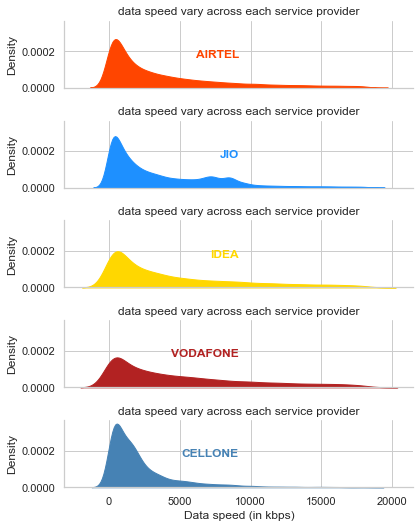

In [64]:
provider = {'JIO':'dodgerblue', 
       'AIRTEL':'orangered', 
       'CELLONE':'steelblue', 
       'IDEA':'gold', 
       'VODAFONE':'firebrick',
       'DOLPHIN':'forestgreen'}
grid = sns.FacetGrid(testing, row='serviceprovider', row_order=pd.unique(testing.serviceprovider), 
                     palette=provider, hue='serviceprovider', height=1.5, aspect=4)
grid.map(sns.kdeplot, 'dataspeed', clip_on=False, shade=True, alpha=1)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, 0.5, label, fontweight='bold',color=color, ha="right", va="center", transform=ax.transAxes)
grid.map(label, 'serviceprovider')
grid.set_axis_labels('Data speed (in kbps)')
grid.set_titles("data speed vary across each service provider")
plt.savefig('speed_dist', bbox_inches='tight')

A look at the distribution in data speed showed that Idea,Jio, Airtel and Vodafone offered speeds exceeding 15 Gbps. The most often observed data speed was ~ 5-8 mbps for most of these Service provider with Airtel,Jio users consistently enjoying even higher speeds (From the nature of its distribution).

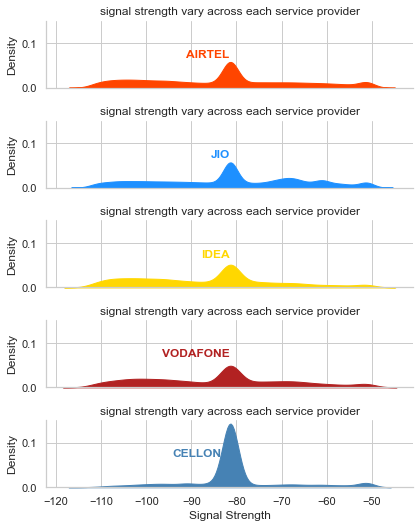

In [65]:
provider = {'JIO':'dodgerblue', 
       'AIRTEL':'orangered', 
       'CELLONE':'steelblue', 
       'IDEA':'gold', 
       'VODAFONE':'firebrick',
       'DOLPHIN':'forestgreen'}
grid = sns.FacetGrid(testing, row='serviceprovider', row_order=pd.unique(testing.serviceprovider), 
                     palette=provider, hue='serviceprovider', height=1.5, aspect=4)
grid.map(sns.kdeplot, 'signalstr', clip_on=False, shade=True, alpha=1)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, 0.5, label, fontweight='bold',color=color, ha="right", va="center", transform=ax.transAxes)
grid.map(label, 'serviceprovider')
grid.set_axis_labels('Signal Strength')
grid.set_titles("signal strength vary across each service provider")
plt.savefig('signal_str', bbox_inches='tight')

As we see Airtel,Jio users consistently enjoying a better signal rate when compare to others.(From the nature of its distribution)

In [66]:
provider   = ['AIRTEL', 'CELLONE', 'IDEA', 'JIO', 'VODAFONE']
for i in provider:
    var = (df.loc[df.serviceprovider==i].dataspeed.value_counts(bins=50))
    print('The most commonly offered data speed by {} is = {}'.format(i, var.index[0]))

The most commonly offered data speed by AIRTEL is = (-18.360000000000003, 367.18]
The most commonly offered data speed by CELLONE is = (-18.173000000000002, 363.44]
The most commonly offered data speed by IDEA is = (-18.357000000000003, 367.12]
The most commonly offered data speed by JIO is = (-18.360000000000003, 367.18]
The most commonly offered data speed by VODAFONE is = (-18.352, 367.02]


In [67]:
provider   = ['AIRTEL', 'CELLONE', 'IDEA', 'JIO', 'VODAFONE']
for i in provider:
    var = (df.loc[df.serviceprovider==i].signalstr.value_counts(bins=50))
    print('The most commonly offered data speed by {} is = {}'.format(i, var.index[0]))

The most commonly offered data speed by AIRTEL is = (-82.24, -81.0]
The most commonly offered data speed by CELLONE is = (-81.5, -80.28]
The most commonly offered data speed by IDEA is = (-81.5, -80.28]
The most commonly offered data speed by JIO is = (-82.24, -81.0]
The most commonly offered data speed by VODAFONE is = (-81.5, -80.28]


In [68]:
def speed(signalstr): # I will write a function that will classify serviceprovider into groups based on signalstrength.
    if signalstr >= -50:
        return 'Good'
    elif signalstr >= -75:
        return 'Average'
    else:
        return 'Bad'

In [69]:
df['category'] = data['signalstr'].apply(speed)


In [70]:
df[['serviceprovider','servicearea','signalstr','category']].head(5)


,serviceprovider,servicearea,signalstr,category
0,AIRTEL,UP East,-59.000000,Average
1,AIRTEL,UP East,-81.363504,Bad
2,AIRTEL,UP East,-59.000000,Average
3,AIRTEL,UP East,-59.000000,Average
4,AIRTEL,UP East,-67.000000,Average


### State-wise Dataspeed

In [71]:
plotdf = df[['serviceprovider','technology','downloadupload','dataspeed','servicearea']]

In [72]:
av_speed = pd.pivot_table(df, values='dataspeed', index='servicearea', aggfunc=np.mean).round()


In [73]:
av_speed

,dataspeed
servicearea,
Andhra Pradesh,4196.0
Assam,3309.0
Bihar,4135.0
Chennai,4282.0
Delhi,3349.0
Gujarat,3945.0
Haryana,3610.0
Himachal Pradesh,3360.0
India,4335.0


To be honest this was the first time I ever spend understanding the data trying to understand each and every detail aspect even the datatypes understanding and converting to appropriate datatypes and so on. I have gained more knowledge over data visualization as to which graph is better for which data types. Graph's play a vital role as you get a clear picture from the visualization. So selecting the right choice is very important. I never thought about the outliers but I learned in this assignment and I could see the difference in the statistics it has impacted. It was challenging at the first sight when you told us to pick a new data and work on it but when I starting working I have really enjoyed it and gained really a lot more knowledge so as to how to deal with new data which is assigned to me.

The primary observation is Jio and Airtel offered comparable average download speeds when compared to others.Jio and Airtel users are more in the country. Mumbai experinces the maximum dataspeed of 5.16 mbps and the North East region the lowest dataspeed of 2.1 mbps and rest of the country with an average dataspeed of 3.8 mbps. So it's better to go with Jio or Airtel.